# Predictive Analysis of Heart Disease Dataset

## Introduction

In the United States, heart disease is the leading cause of death in both men and women. Coronary heart disease (CHD) is a type of heart disease, where the arteries struggle with supplying oxygen and nutrient-rich blood to heart. The most common cause is the buildup of fatty plaques along the arteries, but there are several factors that affect one's diagnosis. 

In the project, I am investigating whether a patient will be diagnosed with heart disease. More precisely, can chest pain type, cholesterol levels, and the number of major vessels colored by flouroscopy accurate predict the prescence of heart disease in patients?

To answer this question, a heart disease dataset from the Cleveland database will be used. The database originally contains 76 attributes but the dataset contains a subset of 14 attributes. This will be further narrowed down into the 5 variables of interest along with the target variable. on

## Preliminary Exploratory Data Analysis

In [35]:
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [92]:
url <- "https://raw.githubusercontent.com/deenahl/dsci-100-2024s-project/main/data/heart_disease/processed.cleveland.data"
data <- read_delim(url, delim=",", col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"))
categorical_variables <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "target")
integer_variables <- c("age", "trestbps", "chol", "thalach", "oldpeak", "ca")
heart_disease_ds <- data |> 
                    mutate(across(all_of(categorical_variables), as_factor)) |>
                    mutate(across(all_of(integer_variables), as.integer)) 
                    # mutate(target = as.logical(target))
heart_disease_ds

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(all_of(integer_variables), as.integer)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2,2,2,7.0,1
37,1,3,130,250,0,0,187,0,3,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1,1,0,3.0,0
56,1,2,120,236,0,0,178,0,0,1,0,3.0,0
62,0,4,140,268,0,2,160,0,3,3,2,3.0,3
57,0,4,120,354,0,0,163,1,0,1,0,3.0,0
63,1,4,130,254,0,2,147,0,1,2,1,7.0,2


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


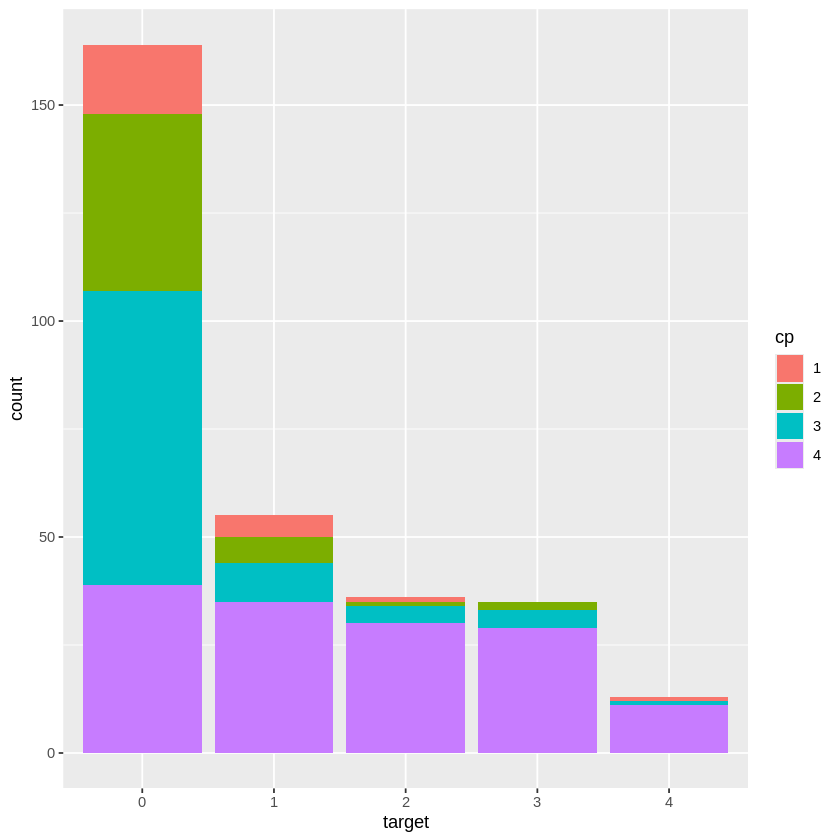

In [106]:
plot <- heart_disease_ds |>
        group_by(cp, target) |>
        ggplot(aes(x = target, fill = cp)) +
        geom_histogram(stat = "count")
plot

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [88]:
set.seed(12)

hd_split <- initial_split(heart_disease_ds, prop = 0.74, strata = target)
hd_train <- training(hd_split) |>
            select("age", "sex", "cp", "chol", "ca", "target")

target_table <- hd_train |>
                group_by(target) |>
                summarize(count = n())

missing_data <- hd_train |>
                rowwise() |>
                mutate(missing = any(is.na(c(age, sex, cp, chol, ca, target)))) |>
                filter(missing == TRUE)

predictor_stats <- hd_train |>
                    summarize(mean_age = mean(age), 
                              mean_chol = mean(chol),
                              median_sex = median(as.numeric(sex)),
                              median_cp = median(as.numeric(cp)),
                              mean_ca = mean(ca, na.rm=TRUE))



# summary_table    
target_table
missing_data
predictor_stats

target,count
<lgl>,<int>
FALSE,121
TRUE,102


age,sex,cp,chol,ca,target,missing
<int>,<fct>,<fct>,<int>,<int>,<lgl>,<lgl>
38,1,3,175,NA,FALSE,TRUE
43,1,4,247,NA,TRUE,TRUE


mean_age,mean_chol,median_sex,median_cp,mean_ca
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.4843,246.0852,2,3,0.6470588


## Methods

For this data analysis, we will be creating a K-Nearest Neighbors classifier. The main predictors that will be investigated are: chest pain type, cholesterol levels, and the number of vessels coloured by fluoroscopy. Additionally, the effects of age and sex will also be investigated to see if these variables influence the prediction of heart disease. The data will be split into training and testing dataset, and standardized separately to ensure that the testing data does not influence model training. Using the training data, we will use cross-validation to fit and train the model several times to minimize overfitting of the data. We can optimize for number of folds and the number of neighbours in the model, before using the model to predict the presence of heart disease in the testing dataset. 

One way to visualization the results could be a table that lists the accuracy, precision, and recall of the testng data predictions. Additionally, we can visualize this information by plotting each data point on a 2D plot for chest pain type and cholesterol levels, and mapping border of a positive or negative prediction based on our model.

## Expected Outcomes and Significance

The impact of these finding could aid in early diagnosis of heart disease. This provides doctors more time to find a treatment that works for the patient, r

Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?